Set up the environment, importing Semantic Kernel SDK and SkiaSharp, used to display images inline.

In [2]:
#r "nuget: Microsoft.SemanticKernel, 0.9.61.1-preview"
#r "nuget: SkiaSharp"

#!import config/Settings.cs
#!import config/Utils.cs
#!import config/SkiaUtils.cs

using Microsoft.SemanticKernel;
using Microsoft.SemanticKernel.Configuration;
using Microsoft.SemanticKernel.Orchestration;
using Microsoft.SemanticKernel.KernelExtensions;
using Microsoft.SemanticKernel.AI.ImageGeneration;
using Microsoft.SemanticKernel.AI.ChatCompletion;

Installed Packages Microsoft.SemanticKernel, 0.9.61.1-preview SkiaSharp, 2.88.3

The notebook uses:

* **OpenAI ChatGPT** to chat with the user
* **OpenAI Dall-E 2** to transform messages into images

In [4]:
var (useAzureOpenAI, model, azureEndpoint, apiKey, orgId) = Settings.LoadFromFile();

var kernel = Microsoft.SemanticKernel.Kernel.Builder
    .Configure(c =>
    {
        c.AddOpenAIChatCompletion("chatgpt", "gpt-3.5-turbo", apiKey, orgId);
        c.AddOpenAIImageGeneration("dallE", apiKey, orgId);
    })
    .Build();

var dallE = kernel.GetService<IImageGeneration>();

var chatGPT = kernel.GetService<IChatCompletion>();

User: hello there!

Bot:



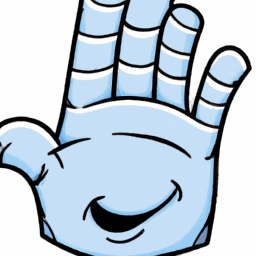

[An image of a friendly waving hand.]



In [ ]:
var chat = (OpenAIChatHistory)chatGPT.CreateNewChat(
            "You're chatting with a user. Instead of replying directly to the user"
            + " provide a description of an image that expresses what you want to say."
            + " The user won't see your message, they will see only the image."
            + " Describe the image with details in one sentence.");

while (true)
{
    // User enters a message
    var userMessage = await InteractiveKernel.GetInputAsync("Your message");
    chat.AddUserMessage(userMessage);
    Console.WriteLine($"User: {userMessage}");

    // Bot replies
    string reply = await chatGPT.GenerateMessageAsync(chat, new ChatRequestSettings());

    // Save reply in the chat history
    chat.AddAssistantMessage(reply);

    // Show the reply as an image
    var imageUrl = await dallE.GenerateImageAsync(reply, 256, 256);
    Console.WriteLine($"\nBot:");
    await SkiaUtils.ShowImage(imageUrl, 256, 256);
    Console.WriteLine($"[{reply}]\n");
}